In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dabest
import numpy as np

In [2]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'

In [3]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [5]:
fig_save_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'stop_epochs.csv')
df = df[df.day=='D1']
df


,subID,group,day,num_stop,proximity_cue,median_duration,median_inter_stop_interval
0,Tg102_D1,tg,D1,89,97.202392,7.966667,15.233333
2,Tg103_D1,tg,D1,106,10.713305,4.566667,11.816667
4,Tg104_D1,tg,D1,93,155.578507,6.200000,12.416667
6,Tg105_D1,tg,D1,77,15.572376,6.166667,11.766667
8,Tg106_D1,tg,D1,75,165.589178,6.100000,15.233333
10,Tg108_D1,tg,D1,67,165.023970,5.100000,11.500000
12,Tg109_D1,tg,D1,75,120.074077,5.600000,14.700000
14,Tg110_D1,tg,D1,57,166.605003,5.766667,17.550000
16,Tg111_D1,tg,D1,92,4.916447,5.833333,13.516667
18,Tg112_D1,tg,D1,117,8.651959,5.133333,11.400000


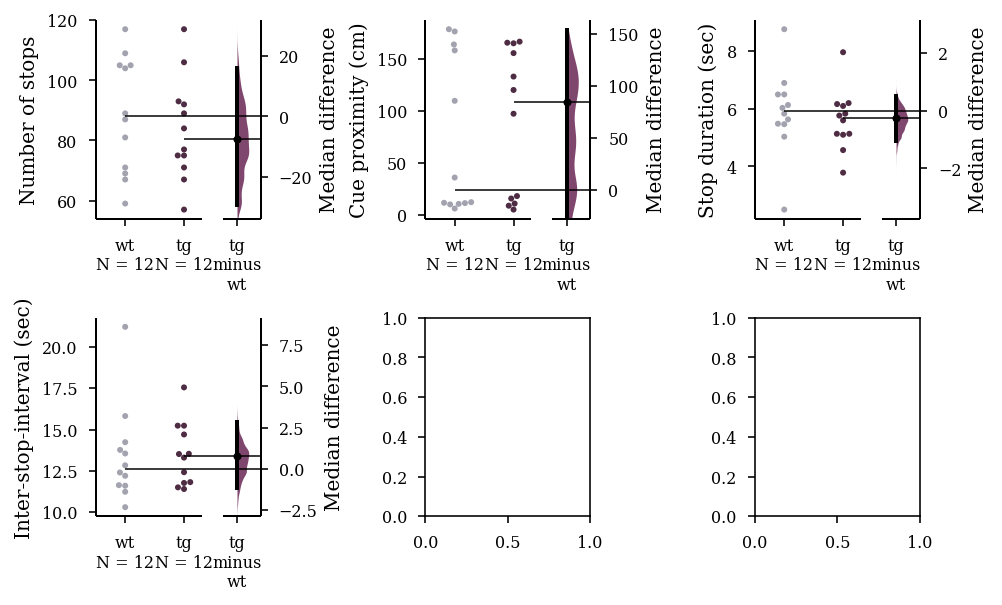

In [6]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=1)
axs = axs.ravel()

flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="num_stop")
dabest_obj.median_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Number of stops")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="proximity_cue")
dabest_obj.median_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Cue proximity (cm)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_duration")
dabest_obj.median_diff.plot(ax=axs[2],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[2].set_ylabel("Stop duration (sec)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_inter_stop_interval")
dabest_obj.median_diff.plot(ax=axs[3],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[3].set_ylabel("Inter-stop-interval (sec)")


plt.savefig(fig_save_path+'stop_epochs_d1.svg',dpi=300,bbox_inches='tight')
plt.savefig(fig_save_path+'stop_epochs_d1.png',dpi=300,bbox_inches='tight')


In [7]:
fig_save_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'stop_epochs.csv')
df = df[df.day=='D2']
df

,subID,group,day,num_stop,proximity_cue,median_duration,median_inter_stop_interval
1,Tg102_D2,tg,D2,136,174.523218,5.050000,10.133333
3,Tg103_D2,tg,D2,84,158.832218,6.883333,14.066667
5,Tg104_D2,tg,D2,108,163.375664,5.383333,14.550000
7,Tg105_D2,tg,D2,66,164.700037,5.733333,13.600000
9,Tg106_D2,tg,D2,104,165.605916,4.166667,10.133333
11,Tg108_D2,tg,D2,77,166.605003,5.333333,14.183333
13,Tg109_D2,tg,D2,53,161.135182,8.200000,18.766667
15,Tg110_D2,tg,D2,81,166.198565,6.100000,12.300000
17,Tg111_D2,tg,D2,97,139.980268,4.633333,12.416667
19,Tg112_D2,tg,D2,59,52.211809,6.100000,13.583333


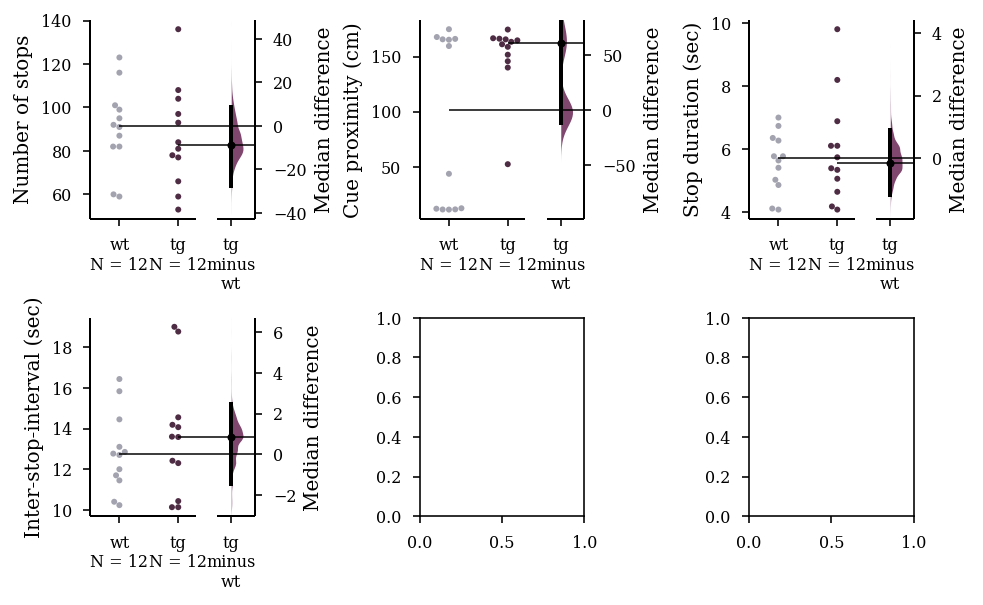

In [8]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=1)
axs = axs.ravel()

flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="num_stop")
dabest_obj.median_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Number of stops")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="proximity_cue")
dabest_obj.median_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Cue proximity (cm)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_duration")
dabest_obj.median_diff.plot(ax=axs[2],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[2].set_ylabel("Stop duration (sec)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_inter_stop_interval")
dabest_obj.median_diff.plot(ax=axs[3],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[3].set_ylabel("Inter-stop-interval (sec)")


plt.savefig(fig_save_path+'stop_epochs_d2.svg',dpi=300,bbox_inches='tight')
plt.savefig(fig_save_path+'stop_epochs_d2.png',dpi=300,bbox_inches='tight')